In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Teste 1 2019-2020
# 1

In [25]:
def p_X(x_vals):
    p = np.zeros(len(x_vals))

    i = 0
    for x in x_vals:
        if 3/2 <= x <= 2:
            p[i] = 4 * (x - 3 / 2)
        elif 2 < x <= 5 / 2:
            p[i] = - 4 * (x - 5 / 2)
        i += 1

    return p

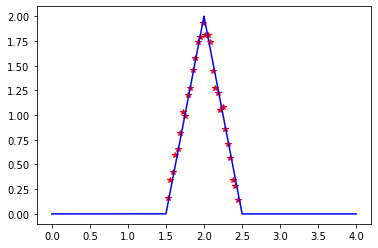

In [26]:
# Mudança de variáveis

n = 10000
r = np.random.rand(n)

x = np.zeros(n)
for i in range(len(r)):
    if 0 <= r[i] <= 1 / 2:
        x[i] = np.sqrt(r[i] / 2) + 3 / 2
    elif 1 / 2 < r[i] <= 1:
        x[i] = -np.sqrt((1 - r[i]) / 2) + 5 / 2

x_max = np.max(x)
x_min = np.min(x)
n_bins = 30
dx = (x_max - x_min) / n_bins

values, bins = np.histogram(x, bins=np.arange(x_min+dx/2, x_max+dx/2, dx))
values = values / (np.sum(values) * dx)

dx = 0.0001
x_values = np.arange(0, 4, dx)
p = p_X(x_values)

plt.figure(1)
plt.plot(bins[:-1], values, '*r')
plt.plot(x_values, p, '-b')

plt.show()


In [27]:
def randsample(p):
    p = p / np.sum(p)
    u = np.random.rand()
    
    s = p[0]
    i = 0
    
    while u > s:
        i += 1
        s += p[i]
    
    return i

In [28]:
def p_X_2(x):
    p = 0
    
    if 3 / 2 <= x <= 2:
        p = 4 * (x - 3 / 2)
    elif 2 < x <= 5 / 2:
        p = - 4 * (x - 5 / 2)

    return p

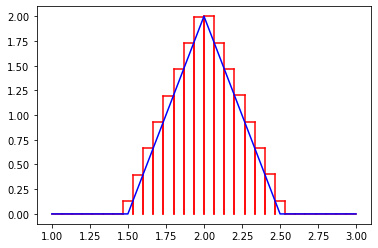

Número Aceites -> 10994
Fração de número rejeitados -> 0.1205


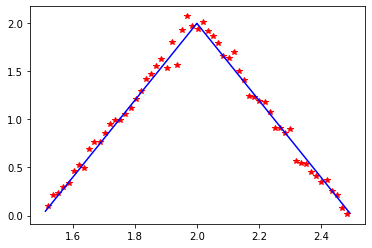

In [35]:
# Método de aceitação/rejeição

n_pnts = 10000
n_pnts += int(1/4*n_pnts) # os q nao vao ser aceites

x_max = 3
x_min = 1
dx = 0.001

n_rec = 30
dx_rec = (x_max - x_min) / n_rec
xi_r = np.arange(x_min, x_max, dx_rec)
xf_r = xi_r + dx_rec

h_r = np.zeros(n_rec)
for i in range(n_rec):
    x_values = np.arange(xi_r[i], xf_r[i], dx)
    h_r[i] = np.max(p_X(x_values))

for i in range(n_rec):
    plt.plot([xi_r[i], xi_r[i]], [0, h_r[i]], '-r')
    plt.plot([xi_r[i], xf_r[i]], [h_r[i], h_r[i]], '-r')
    plt.plot([xf_r[i], xf_r[i]], [h_r[i], 0], '-r')

plt.plot(np.arange(x_min, x_max, dx), p_X(np.arange(x_min, x_max, dx)), '-b')
plt.show()

x_accepted = list()
xp, yp = np.zeros(n_pnts), np.zeros(n_pnts)

n, n_a = 0, 0
i = 0

Ai = (xf_r - xi_r) * h_r
p = Ai / np.sum(Ai)

for i in range(n_pnts):
    i_r = randsample(p)
    
    xp[i] = np.random.rand() * (xf_r[i_r] - xi_r[i_r]) + xi_r[i_r]
    yp[i] = np.random.rand() * h_r[i_r]
    n += 1
    
    if yp[i] <= p_X_2(xp[i]):
        x_accepted.append(xp[i])
        n_a += 1

x_accepted = np.array(x_accepted)

print("Número Aceites -> {:d}".format(n_a))
print("Fração de número rejeitados -> {:.4f}".format(1 - n_a / n))

x_max = np.max(x_accepted)
x_min = np.min(x_accepted)
n_bins = 60
dx = (x_max - x_min) / n_bins

values, bins = np.histogram(x_accepted, bins=np.linspace(x_min+dx/2, x_max+dx/2, n_bins))
values = values / (dx * np.sum(values))

plt.figure(1)
plt.plot(bins[0:-1], values, '*r')
plt.plot(np.arange(x_min, x_max, 0.0001), p_X(np.arange(x_min, x_max, 0.0001)), '-b')

plt.show()


In [30]:
# 2

In [31]:
def ex_2a(N, E0, t_stop, t_max):

    n1 = int(np.floor((N - E0) / 2))
    s = - np.ones(N)
    s[n1+1:N] = 1

    E = np.sum(s)
    ED = E0 - E

    k = 0
    E_mean = 0
    ED_mean = 0

    for t in range(t_max):
        for flip in range(N):
            idx_flip = np.random.randint(0, N)
            
            delta_E = - 2 * s[idx_flip]
        
            if delta_E < 0:
                s[idx_flip] = - s[idx_flip]
                ED += - delta_E
                E += delta_E
            else:
                if ED >= delta_E:
                    s[idx_flip] = - s[idx_flip]
                    ED += - delta_E
                    E += delta_E
        
        if t >= t_stop:
            k += 1
            E_mean += E
            ED_mean += ED
    
    return (E_mean / k, ED_mean / k)


In [32]:
def ex_2b(N, E0, t_stop, t_max):

    n = np.zeros(2)
    e_part = np.array([-1, 1])
    n[0] = int(np.floor((N - E0) / 2))
    n[1] = N - n[0]

    E = N - 2 * n[0]
    ED = E0 - E
    
    k = 0
    E_mean = 0
    ED_mean = 0

    for t in range(t_max):
        for flip in range(2):
            idx_flip = np.random.randint(2)
            
            delta_E = - 2 * e_part[idx_flip]
        
            if delta_E < 0:
                if n[0] < N:
                    n[0] += 1
                    n[1] += - 1
                    ED += - delta_E
                    E += delta_E
            else:
                if ED >= delta_E:
                    if n[0] >= 1:
                        n[0] += - 1
                        n[1] += 1
                        ED += - delta_E
                        E += delta_E
        
        if t >= t_stop:
            k += 1
            E_mean += E
            ED_mean += ED
    
    return (E_mean / k, ED_mean / k)


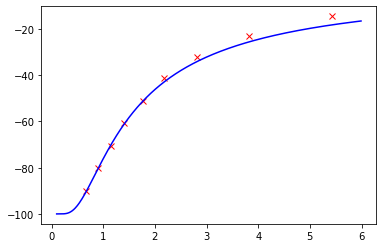

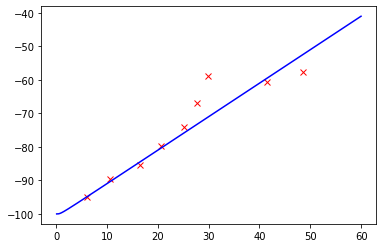

In [33]:
N = 100

E0_vals = np.arange(- N + N / 10, - N + 9 * N / 10 + 1, N / 10)

t_max = 10000
t_stop = 1000

E_a = np.zeros(len(E0_vals))
ED_a = np.zeros(len(E0_vals))

k = 0
for E0 in E0_vals:
    E_a[k], ED_a[k] = ex_2a(N, E0, t_stop, t_max)
    k += 1

t_max = 10000
t_stop = 1000

E_b = np.zeros(len(E0_vals))
ED_b = np.zeros(len(E0_vals))

k = 0
for E0 in E0_vals:
    E_b[k], ED_b[k] = ex_2b(N, E0, t_stop, t_max)
    k += 1
    
T_a = 2 / np.log((ED_a + 2) / (ED_a))
T_b = 2 / np.log((ED_b + 2) / (ED_b))

plt.figure(1)
plt.plot(T_a, E_a, 'xr')

T = np.arange(0.1, 6, 0.01)
E = - N * np.tanh(1 / T)
plt.plot(T, E, '-b')

plt.figure(2)
plt.plot(T_b, E_b, 'xr')

T = np.arange(0.1, 60, 0.01)
E = - N + 2 / (np.exp(2 / T) - 1)
plt.plot(T, E, '-b')

plt.show()
